In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.manifold import TSNE

## Weights

In [2]:
file_path = "/Users/flint/Data/recipe/italian/gz_recipe.csv"
R = pd.read_csv(filepath_or_buffer=file_path, index_col=0)
data = pd.read_csv("/Users/flint/Data/recipe/italian/dataframe.csv", index_col=0)

## Term Frequency (TF)

$$
TF(t, d) = \frac{count(t, d)}{\sum\limits_{i \in T} count(t_i, d)}
$$

In [3]:
data 

,0,1,2,3,4,5,6,7,8,9,...,5929,5930,5931,5932,5933,5934,5935,5936,5937,5938
tiramisù,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
\n,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mascarpone,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
",",14.0,9.0,14.0,7.0,10.0,39.0,5.0,14.0,16.0,7.0,...,11.0,12.0,12.0,7.0,24.0,15.0,18.0,13.0,13.0,20.0
uova,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
daiquiri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
bicchieri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
raffreddira,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
len_doc = data.sum(axis=0)

In [5]:
tf_data = data / len_doc

In [6]:
tf_data['60'].sort_values(ascending=False).head(10)

il         0.086402
,          0.055241
di         0.025496
uno        0.025496
impasto    0.021246
per        0.019830
con        0.019830
in         0.018414
e          0.018414
.          0.016997
Name: 60, dtype: float64

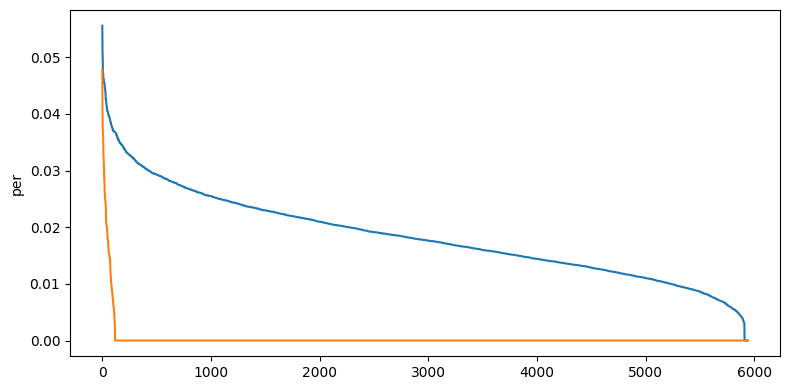

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(y=tf_data.loc['per'].sort_values(ascending=False), x=range(tf_data.shape[1]))
sns.lineplot(y=tf_data.loc['tonno'].sort_values(ascending=False), x=range(tf_data.shape[1]))
plt.tight_layout()
plt.show()

In [8]:
tf_data 

,0,1,2,3,4,5,6,7,8,9,...,5929,5930,5931,5932,5933,5934,5935,5936,5937,5938
tiramisù,0.009524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
\n,0.006349,0.012739,0.006897,0.012739,0.008130,0.002915,0.020619,0.006154,0.006173,0.012658,...,0.007634,0.009950,0.009662,0.018018,0.008368,0.010101,0.005571,0.009524,0.010989,0.008
mascarpone,0.012698,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005571,0.000000,0.000000,0.000
",",0.044444,0.057325,0.048276,0.044586,0.040650,0.056851,0.051546,0.043077,0.049383,0.044304,...,0.041985,0.059701,0.057971,0.063063,0.100418,0.075758,0.050139,0.061905,0.071429,0.080
uova,0.003175,0.006369,0.003448,0.000000,0.004065,0.001458,0.000000,0.000000,0.003086,0.000000,...,0.000000,0.000000,0.000000,0.009009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
daiquiri,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.019324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
dela,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004184,0.000000,0.000000,0.000000,0.000000,0.000
bicchieri,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004762,0.000000,0.000
raffreddira,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004762,0.000000,0.000


## Document Frequency

$$
DF(t) = \frac{\mid \{d : t \in d\} \mid}{\mid D \mid }
$$

$$
IDF(t) =  \log \left ( \frac{\mid D \mid }{\mid \{d : t \in d\} \mid} \right )
$$

In [9]:
idf_u = tf_data.shape[1] / tf_data.astype(bool).sum(axis=1)
idf = np.log(idf_u)
idf 

tiramisù         5.105777
\n               0.000000
mascarpone       3.918611
,                0.000674
uova             1.120400
                   ...   
daiquiri         8.689296
dela             8.689296
bicchieri        8.689296
raffreddira      8.689296
emulsionatere    8.689296
Length: 15965, dtype: float64

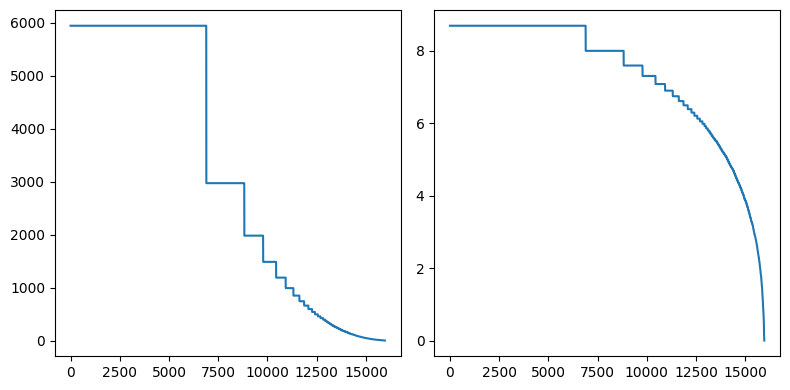

In [10]:
fig, ax = plt.subplots(figsize=(8, 4), ncols=2)
ax[0].plot(idf_u.sort_values(ascending=False).values)
ax[1].plot(np.log(idf_u.sort_values(ascending=False).values))
plt.tight_layout()
plt.show()

## TfIdf

$$
TFIDF(t, d) = TF(t, d) IDF(t)
$$

In [11]:
tfidf = (tf_data.T * idf).T
tfidf 

,0,1,2,3,4,5,6,7,8,9,...,5929,5930,5931,5932,5933,5934,5935,5936,5937,5938
tiramisù,0.048626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
\n,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mascarpone,0.049760,0.000000,0.000000,0.124797,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.021831,0.000000,0.000000,0.000000
",",0.000030,0.000039,0.000033,0.000030,0.000027,0.000038,0.000035,0.000029,0.000033,0.00003,...,0.000028,0.00004,0.000039,0.000042,0.000068,0.000051,0.000034,0.000042,0.000048,0.000054
uova,0.003557,0.007136,0.003863,0.000000,0.004554,0.001633,0.000000,0.000000,0.003458,0.00000,...,0.000000,0.00000,0.000000,0.010094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
daiquiri,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.167909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dela,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.036357,0.000000,0.000000,0.000000,0.000000,0.000000
bicchieri,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041378,0.000000,0.000000
raffreddira,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041378,0.000000,0.000000


In [12]:
tf_data['1200'].sort_values(ascending=False).head(10)

il         0.081571
,          0.069486
di         0.045317
e          0.030211
in         0.030211
filetto    0.021148
uno        0.018127
per        0.018127
manzo      0.015106
a          0.015106
Name: 1200, dtype: float64

In [13]:
tfidf['1200'].sort_values(ascending=False).head(10)

filetto       0.063709
manzo         0.055874
crosta        0.045728
battuto       0.036557
tanto         0.028953
pistacco      0.023526
sigillo       0.022063
servire vi    0.022063
carne         0.021467
ruotatelo     0.020838
Name: 1200, dtype: float64

In [14]:
tfidf.to_csv("/Users/flint/Data/recipe/italian/tfidf.csv")

## TfIdf usando solo gli Steps

In [15]:
R 

,Nome,Categoria,Link,Persone/Pezzi,Ingredienti,Steps
0,Tiramisù,Dolci,https://ricette.giallozafferano.it/Tiramisu.html,8,"[['Mascarpone', '750g'], ['Uova', '260g'], ['S...",Per preparare il tiramisù preparate il caffé c...
1,Cookies,Dolci,https://ricette.giallozafferano.it/Cookies.html,12,"[['Farina 00', '195g'], ['Burro', '100g'], ['B...","Per preparare i cookies, assicuratevi che il b..."
2,Pancake allo sciroppo d'acero,Dolci,https://ricette.giallozafferano.it/Pancakes-al...,4,"[['Burro', '25g'], ['Farina 00', '125g'], ['Uo...",Iniziamo la preparazione dei pancake fondendo ...
3,Crema al mascarpone,Dolci,https://ricette.giallozafferano.it/Crema-al-ma...,4,"[['Mascarpone', '500g'], ['Zucchero', '125g'],...",Per preparare la crema al mascarpone versate i...
4,Crepe dolci e salate (ricetta base),Dolci,https://ricette.giallozafferano.it/Crepes-dolc...,15,"[['Uova', '3'], ['Farina 00', '250g'], ['Latte...",Per preparare le crepe dolci e salate iniziate...
...,...,...,...,...,...,...
5934,Bowl di anguria e tofu,Dolci,https://ricette.giallozafferano.it/Bowl-di-ang...,4,"[['Cocomero (anguria)', '450g'], ['Fragole', '...",Per realizzare la bowl di anguria e tofu per p...
5935,Granita bicolore con finto gelato,Dolci,https://ricette.giallozafferano.it/Granita-bic...,4,"[['Cocomero (anguria)', '400g'], ['Melone cant...",Per preparare la granita bicolore con finto ge...
5936,Bicchieri di albicocche e robiola,Dolci,https://ricette.giallozafferano.it/Bicchieri-d...,4,"[['Albicocche', '500g'], ['Zucchero', '50g'], ...",Per preparare i bicchieri di albicocche e robi...
5937,Fiori di Eglefino zucca e pesto,Secondi piatti,https://ricette.giallozafferano.it/Fiori-di-Eg...,2,"[['Eglefino', '2'], ['Zucca mantovana', '1kg']...",Per realizzare i Fiori di Eglefino zucca e pes...


In [17]:
print(R['Steps'].values[0])

Per preparare il tiramisù preparate il caffé con la moka per ottenerne 300 g, poi zuccherate a piacere (noi abbiamo messo un cucchiaino) e lasciatelo raffreddare in una ciotolina bassa e ampia. Separate le uova dividendo gli albumi dai tuorli ricordando che per montare bene gli albumi non dovranno presentare alcuna traccia di tuorlo. Montate i tuorli con le fruste elettriche, versando solo metà dose di zucchero Non appena il composto sarà diventato chiaro e spumoso, e con le fruste ancora in funzione, potrete aggiungere il mascarpone, poco alla volta Incorporato tutto il formaggio avrete ottenuto una crema densa e compatta Quando saranno schiumosi versate il restante zucchero un po’ alla volta Dovrete montarli a neve ben ferma così stempererete il composto. Dopodiché procedete ad aggiungere la restante parte di albumi, poco alla volta mescolando molto delicatamente dal basso verso l'alto La crema al mascarpone è ora pronta Distribuitene una generosa cucchiaiata sul fondo di una pirofil

### Uso di from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize

In [23]:
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, max_df=4000, min_df=10)

In [38]:
corpus = [x for x in R['Steps'].values if not pd.isnull(x)]
titles = [x for i, x in enumerate(R['Nome'].values) if not pd.isnull(R['Steps'].values[i])]

In [27]:
X = vectorizer.fit_transform(corpus)

/Users/flint/.pyenv/versions/3.9.17/envs/nlp/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [31]:
words = vectorizer.get_feature_names_out()
print(words[200:210])
print(len(words))

['acciaio' 'acciughe' 'accompagnamento' 'accompagnando' 'accompagnandola'
 'accompagnandoli' 'accompagnandolo' 'accompagnare' 'accompagnata'
 'accompagnate']
4449


In [40]:
df_corpus = pd.DataFrame(X.toarray(), columns=words, index=titles) 

## Ricerca del testo
- Trasformiamo il corpus in forma vettoriale usano TfIdf
- Trasformiamo la query in forma vettoriale usando lo stesso criterio 
- Misurare la distanza fra vettore della query e vettori dei documenti
- Ordiniamo i documenti dal più simile al meno simile

In [44]:
df_corpus.head(2)

,!,%,&,','',(,),-,-18,...,...,°,¼,½,¾,à,è,‘,’,“,”
Tiramisù,0.049258,0.0,0.0,0.0,0.0,0.029340,0.029303,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.078517,0.0,0.046217,0.0,0.0
Cookies,0.000000,0.0,0.0,0.0,0.0,0.051515,0.051450,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [62]:
query = "zucchine pomodori mozzarella olio insalata"
q = pd.DataFrame(vectorizer.transform([query]).toarray(), columns=words)

In [63]:
q

,!,%,&,','',(,),-,-18,...,...,°,¼,½,¾,à,è,‘,’,“,”
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
sigma = pd.DataFrame(cosine_similarity(q, df_corpus), columns=df_corpus.index.values)

In [66]:
sigma.loc[0].sort_values(ascending=False).head(10)

Pizzette di zucchine                               0.370303
Parmigiana di zucchine                             0.368887
Zucchine ripiene vegetariane                       0.328477
Rotolo di mozzarella farcito                       0.315080
Pomodori  gratinati alla pugliese                  0.310268
Spaghetti quadrati con sugo fresco e mozzarella    0.306991
Zucchine fritte                                    0.304959
Zucchine alla pizzaiola                            0.299084
Insalata con tonno, mozzarella e peperoni          0.287978
Spaghetti ai tre pomodori                          0.282260
Name: 0, dtype: float64